In [1]:
import os, sys
sys.path.insert(0, os.environ['PROJECT_PATH'])

In [2]:
from config.resources import path_to

In [3]:
import pandas as pd

In [4]:
path_to_groups = path_to['with_msa_endpoint'].format(endpoint='groups', query='')
groups_df = pd.read_csv(path_to_groups, encoding='latin1')

In [5]:
groups_df['formatted_time'] = pd.to_datetime(groups_df['created'], unit='ms')

In [6]:
groups_df.head()

,category.name,created,id,lat,link,lon,members,name,past_event_count,status,topics.urlkey,who,MSA_NAME,MSA_CODE,last_event.yes_rsvp_count,next_event.yes_rsvp_count,plain_text_description,last_event.time,next_event.time,formatted_time
0,Tech,1500081086000,24988763,39.12,https://www.meetup.com/Effingham-Area-Software...,-88.59,40,Effingham Area Software Development Group,8.0,active,"(webdesign, softwaredev, internetpro, web, tec...",Software Developers,"Effingham, IL Micro Area",20820.0,11.0,3.0,This is a group for software developers in the...,1.518134e+12,1.519258e+12,2017-07-15 01:11:26
1,Dancing,1507341991000,26180108,38.70,https://www.meetup.com/line-dancing-meetup/,-89.78,77,line dancing meetup,17.0,active,"(linedancing, country-dancing, social-dancing,...",Members,"St. Louis, MO-IL Metro Area",41180.0,1.0,1.0,walk in and dance out. all skill levels welcom...,1.518134e+12,1.518739e+12,2017-10-07 02:06:31
2,Health & Wellbeing,1333250797000,3584122,38.92,https://www.meetup.com/Mulberry-Grove-Herbal-S...,-89.27,79,Mulberry Grove Herbal Study,20.0,active,"(wild-foods, herbalists, native-plants, garden...",Members,"St. Louis, MO-IL Metro Area",41180.0,7.0,NaN,This is a monthly group for people interested ...,1.508108e+12,NaN,2012-04-01 03:26:37
3,Tech,1504911251000,25843931,39.19,https://www.meetup.com/SiliCorn-Valley-Softwar...,-89.64,14,SiliCorn Valley Software Craftsmanship Meetup,NaN,active,"(softwaredev, newtech, computer-programming)",Members,NaN,NaN,NaN,NaN,Software developers of the south I-55 corridor...,NaN,NaN,2017-09-08 22:54:11
4,Education & Learning,1504025209000,25695333,39.19,https://www.meetup.com/Montgomery-County-Toast...,-89.64,5,Montgomery County Toastmasters,1.0,active,"(toastmasters, self-improvement, prodev, profe...",Members,NaN,NaN,1.0,NaN,Come join us as we practice public speaking sk...,1.504829e+12,NaN,2017-08-29 16:46:49


In [7]:
from __future__ import print_function
import seaborn as sns, matplotlib.pyplot as plt

sns.set()
%matplotlib inline

## Restrict Data to Metro Areas

In [8]:
groups_df.dropna(subset=[ 'MSA_CODE' ], inplace=True)
metro_groups_df = groups_df[ groups_df['MSA_NAME'].str.contains('Metro') ]

groups_by_metro = metro_groups_df.groupby([ 'MSA_CODE', 'MSA_NAME' ], as_index=False)

## Explore Metro Areas with most number of groups

In [9]:
groups_by_metro_count = groups_by_metro.count()
top_metros = groups_by_metro_count.nlargest(30, 'id')
top_metros['MSA_NAME'] = top_metros["MSA_NAME"].apply(lambda x: x.split(',')[0])

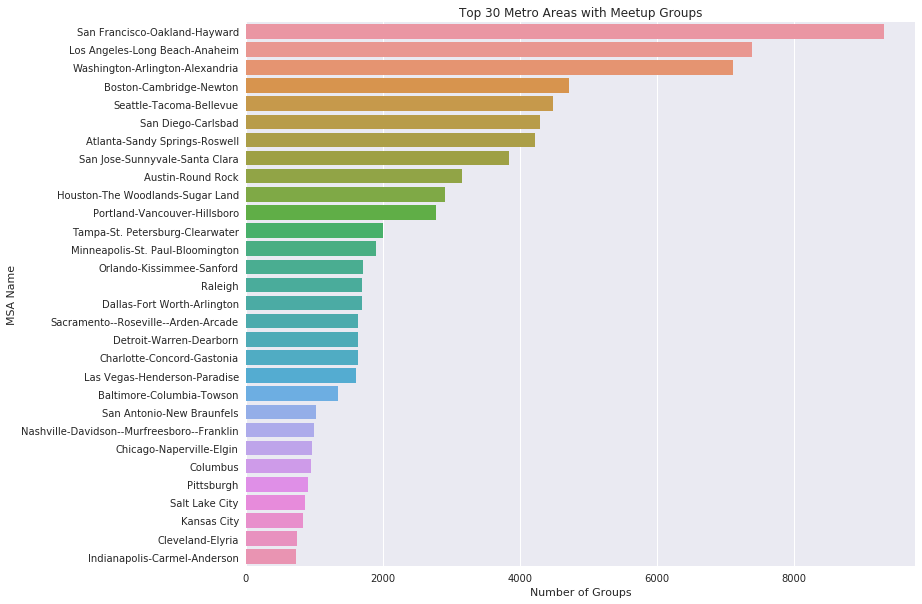

In [11]:
plt.subplots(figsize=(12,10))
ax = sns.barplot(y='MSA_NAME', x='id', data=top_metros)
ax.set_xlabel('Number of Groups')
ax.set_ylabel('MSA Name')
ax.axes.set_title('Top 30 Metro Areas with Meetup Groups')
print()

## Explore attributes of top-5 Metro Areas with most number of groups

In [13]:
group_count_lower_bound = groups_by_metro.count().nlargest(5, 'id')['id'].min()
sample_groups = groups_by_metro.filter(lambda x: x['id'].count() >= group_count_lower_bound)

### Explore top-5 groups in each of the sample metro areas ordered by number of past events

In [29]:
sample_groups_sorted_by_events = sample_groups.sort_values([ 'MSA_CODE', 'past_event_count' ], ascending=False)
sample_groups_sorted_by_events.groupby([ 'MSA_NAME' ]).apply(lambda x: x.head(5))

category.name  \
MSA_NAME                                                                            
Boston-Cambridge-Newton, MA-NH Metro Area          93857              Socializing   
                                                   95383      Sports & Recreation   
                                                   95012                  Support   
                                                   57576         Parents & Family   
                                                   35421                  Fitness   
Los Angeles-Long Beach-Anaheim, CA Metro Area      110324     Sports & Recreation   
                                                   108316  New Age & Spirituality   
                                                   107467                   Games   
                                                   109762                 Support   
                                                   108059        Parents & Family   
San Francisco-Oakland-Hayward, CA Metro Area       77986                  Dancing   
                                                   78039                  Fitness   
                                                   71975                  Fitness   
                                                   77809                  Writing   
                                                   78833                  Dancing   
Seattle-Tacoma-Bellevue, WA Metro Area             19319        Career & Business   
                                                   19546         Parents & Family   
                                                   16911           Arts & Culture   
                                                   18117     Outdoors & Adventure   
                                                   16915                    Games   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 63960                     Tech   
                                                   63959         Sci-Fi & Fantasy   
                                                   64008                     LGBT   
                                                   64806                  Fitness   
                                                   65105                  Fitness   

                                                                 created  \
MSA_NAME                                                                   
Boston-Cambridge-Newton, MA-NH Metro Area          93857   1200316050000   
                                                   95383   1264058811000   
                                                   95012   1308510761000   
                                                   57576   1226263902000   
                                                   35421   1233149767000   
Los Angeles-Long Beach-Anaheim, CA Metro Area      110324  1340583907000   
                                                   108316  1232734226000   
                                                   107467  1199266791000   
                                                   109762  1293825400000   
                                                   108059  1303962816000   
San Francisco-Oakland-Hayward, CA Metro Area       77986   1354221012000   
                                                   78039   1295730587000   
                                                   71975   1294347520000   
                                                   77809   1187902168000   
                                                   78833   1235689844000   
Seattle-Tacoma-Bellevue, WA Metro Area             19319   1274749214000   
                                                   19546   1232512484000   
                                                   16911   1164041729000   
                                                   18117   1330486477000   
                                                   16915   1409787464000   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 63960   1333912341000   
                        

### Explore top-5 groups ineach of the sample metro areas order by number of members

In [30]:
sample_groups_sorted_by_members = sample_groups.sort_values([ 'MSA_CODE', 'members' ], ascending=False)
sample_groups_sorted_by_members.groupby([ 'MSA_NAME']).apply(lambda x: x.head(5))

category.name  \
MSA_NAME                                                                          
Boston-Cambridge-Newton, MA-NH Metro Area          93849            Socializing   
                                                   93846                   Tech   
                                                   93859            Socializing   
                                                   93915            Socializing   
                                                   93857            Socializing   
Los Angeles-Long Beach-Anaheim, CA Metro Area      107448                 Music   
                                                   107449  Outdoors & Adventure   
                                                   107543           Socializing   
                                                   107450  Outdoors & Adventure   
                                                   107447           Socializing   
San Francisco-Oakland-Hayward, CA Metro Area       78021            Socializing   
                                                   77798                   Tech   
                                                   77787            Socializing   
                                                   77904   Outdoors & Adventure   
                                                   77781      Career & Business   
Seattle-Tacoma-Bellevue, WA Metro Area             18116            Socializing   
                                                   18118   Outdoors & Adventure   
                                                   18115   Outdoors & Adventure   
                                                   17208   Outdoors & Adventure   
                                                   18120                   Tech   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 63964            Socializing   
                                                   63956   Education & Learning   
                                                   101742  Outdoors & Adventure   
                                                   101763                  Tech   
                                                   63985      Career & Business   

                                                                 created  \
MSA_NAME                                                                   
Boston-Cambridge-Newton, MA-NH Metro Area          93849   1349201056000   
                                                   93846   1193170472000   
                                                   93859   1389850626000   
                                                   93915   1188843684000   
                                                   93857   1200316050000   
Los Angeles-Long Beach-Anaheim, CA Metro Area      107448  1175501919000   
                                                   107449  1150086246000   
                                                   107543  1255312755000   
                                                   107450  1185917062000   
                                                   107447  1420357125000   
San Francisco-Oakland-Hayward, CA Metro Area       78021   1260906283000   
                                                   77798   1269470260000   
                                                   77787   1422778818000   
                                                   77904   1325491320000   
                                                   77781   1310266036000   
Seattle-Tacoma-Bellevue, WA Metro Area             18116   1255316273000   
                                                   18118   1173504010000   
                                                   18115   1171680805000   
                                                   17208   1162060375000   
                                                   18120   1304705301000   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 63964   1132250743000   
                                                   63956   1359445940000   


### Explore top-5 categories in each Metro Area

In [59]:
sample_groups_category_count = sample_groups.groupby(['MSA_CODE', 'MSA_NAME', 'category.name']).count().reset_index()
sample_groups_category_count.rename(columns={ 'id': 'count'}, inplace=True)
group_category_counts_by_msa = sample_groups_category_count[ ['MSA_NAME', 'count', 'category.name']].groupby('MSA_NAME')
group_category_counts_by_msa.apply(lambda x: x.sort_values('count', ascending=False).head(5)).drop('MSA_NAME', axis=1)

count  \
MSA_NAME                                                        
Boston-Cambridge-Newton, MA-NH Metro Area          31     782   
                                                   2      585   
                                                   28     360   
                                                   11     328   
                                                   19     216   
Los Angeles-Long Beach-Anaheim, CA Metro Area      35    1129   
                                                   64     784   
                                                   44     675   
                                                   52     473   
                                                   61     461   
San Francisco-Oakland-Hayward, CA Metro Area       97    1861   
                                                   68    1349   
                                                   77     744   
                                                   94     530   
                                                   85     476   
Seattle-Tacoma-Bellevue, WA Metro Area             130    706   
                                                   101    628   
                                                   110    294   
                                                   118    284   
                                                   127    260   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 134   1049   
                                                   163    831   
                                                   160    562   
                                                   143    449   
                                                   151    293   

                                                                 category.name  
MSA_NAME                                                                        
Boston-Cambridge-Newton, MA-NH Metro Area          31                     Tech  
                                                   2         Career & Business  
                                                   28              Socializing  
                                                   11       Health & Wellbeing  
                                                   19   New Age & Spirituality  
Los Angeles-Long Beach-Anaheim, CA Metro Area      35        Career & Business  
                                                   64                     Tech  
                                                   44       Health & Wellbeing  
                                                   52   New Age & Spirituality  
                                                   61              Socializing  
San Francisco-Oakland-Hayward, CA Metro Area       97                     Tech  
                                                   68        Career & Business  
                                                   77       Health & Wellbeing  
                                                   94              Socializing  
                                                   85   New Age & Spirituality  
Seattle-Tacoma-Bellevue, WA Metro Area             130                    Tech  
                                                   101       Career & Business  
                                                   110      Health & Wellbeing  
                                                   118  New Age & Spirituality  
                                                   127             Socializing  
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 134       Career & Business  
                                                   163                    Tech  
                                                   160             Socializing  
                                                   143      Health & Wellbeing  
                                                   151  New Age & Spirituality

### Exploring distribution of categories among groups in the sample Metro Areas

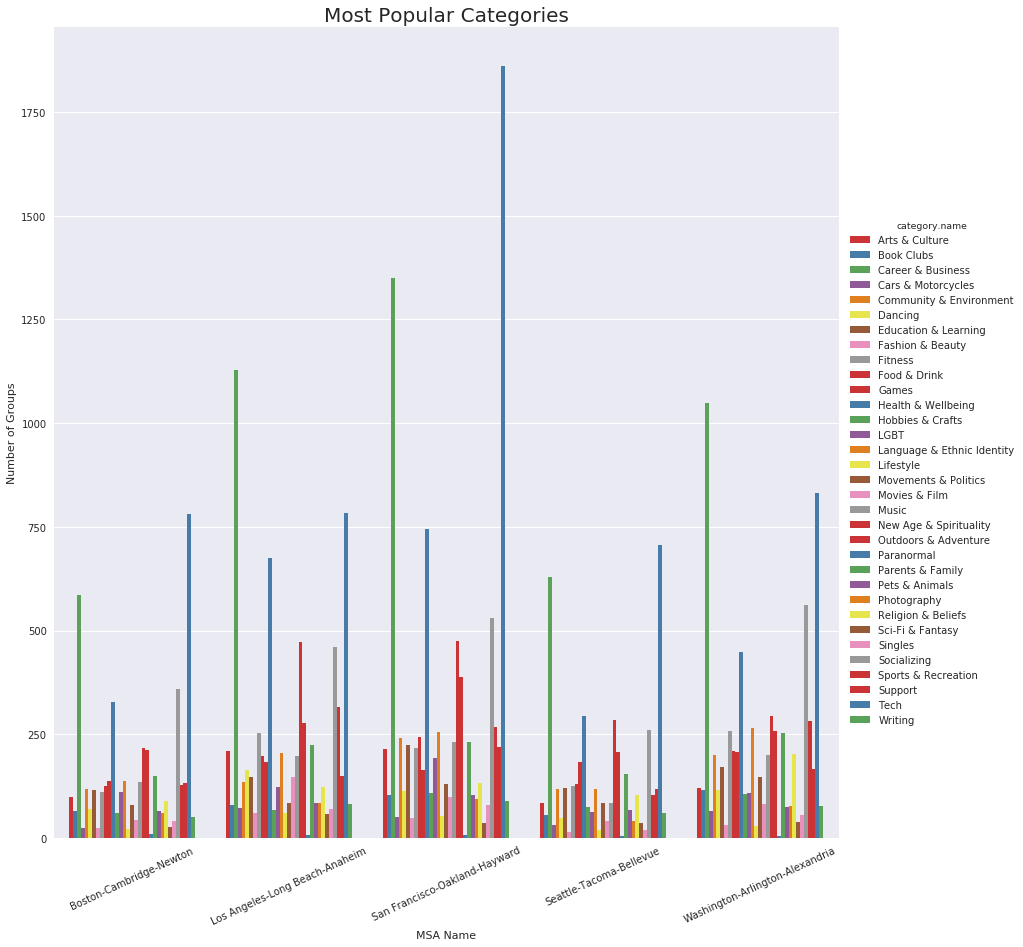

In [62]:
sample_groups_category_count['MSA_NAME'] = sample_groups_category_count['MSA_NAME'].apply(lambda x: x.split(',')[0])

g = sns.factorplot(x='MSA_NAME', y='count', kind='bar', hue='category.name', size=12, 
                   palette=sns.color_palette('Set1', 10), data=sample_groups_category_count)

g.set_xlabels('MSA Name')
g.set_ylabels('Number of Groups')
g.set_xticklabels(rotation=25)

plt.title('Most Popular Categories', fontsize=20)
print()